In [1]:
np_file = "/home/ubuntu/workdir/hariharan/AutoSeg-SAM2/output/KU_EL_20_large_tweak_256/large/final-output/mask_000.npy"


np_file = "/home/ubuntu/workdir/hariharan/AutoSeg-SAM2/output/KU_EL_20_middle/middle/final-output/mask_000.npy"

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np 
import cv2

In [3]:
f = np.load(np_file)

In [4]:
f.shape

(283, 1, 1024, 2048)

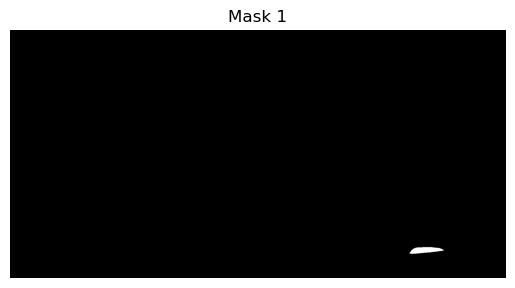

In [5]:
# Assuming 'f' is your array with shape (438, 1, 1024, 2048)

# Step 1: Select the mask index you want to display (e.g., 0 for the first mask)
mask_index = 1  # Change this to any index between 0 and 437

# Step 2: Extract the mask data
mask = f[mask_index, 0, :, :]  # This will give you a 2D array of shape (1024, 2048)

# Step 3: Display the mask using Matplotlib
plt.imshow(mask, cmap='gray')  # You can change 'gray' to any other colormap you prefer
plt.title(f'Mask {mask_index}')
plt.axis('off')  # Hide the axis ticks and labels
plt.show()


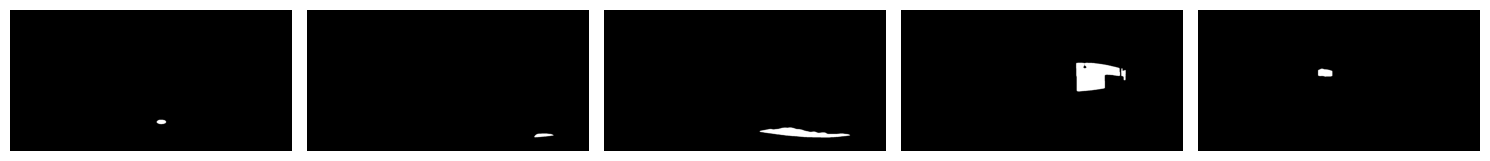

In [6]:
mask_indices = [i for i in range(5)]  # Indices of the masks you want to display
fig, axes = plt.subplots(1, len(mask_indices), figsize=(15, 5))

for ax, idx in zip(axes, mask_indices):
    mask = f[idx, 0, :, :]
    ax.imshow(mask, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


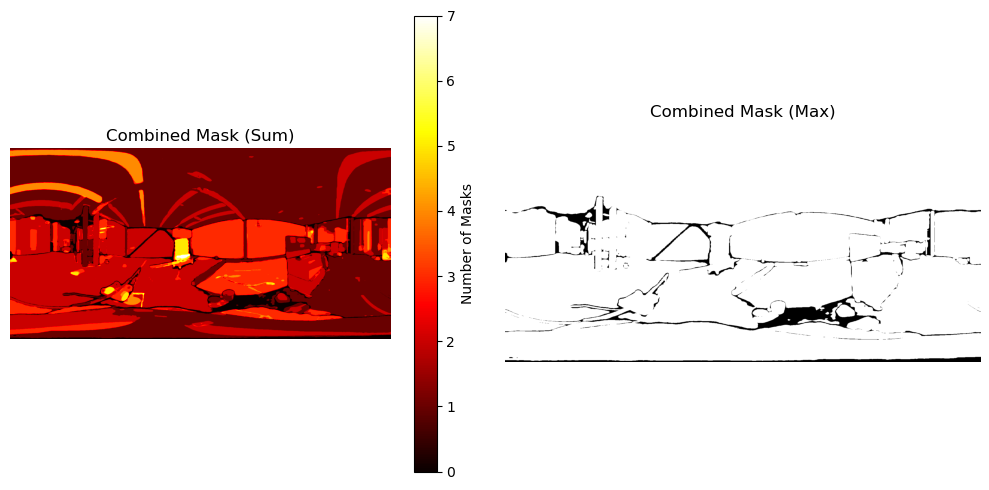

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'f' is your array with shape (438, 1, 1024, 2048)

# Step 1: Combine all masks
# Option 1: Sum the masks to see how many times each pixel is masked

combined_mask_sum = f[:, 0, :, :].sum(axis=0)  # Shape: (1024, 2048)

# Option 2: Take the maximum to create a binary mask where a pixel is masked if it's masked in any mask
combined_mask_max = f[:, 0, :, :].max(axis=0)

# Step 2: Display the combined masks

# Display the summed masks
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(combined_mask_sum, cmap='hot')
plt.colorbar(label='Number of Masks')
plt.title('Combined Mask (Sum)')
plt.axis('off')

# Display the max masks
plt.subplot(1, 2, 2)
plt.imshow(combined_mask_max, cmap='gray')
plt.title('Combined Mask (Max)')
plt.axis('off')

plt.tight_layout()
plt.show()


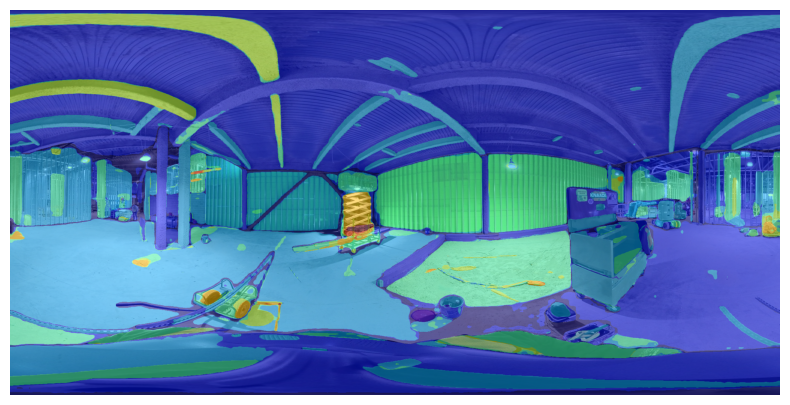

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Step 1: Load the Original Image
# Replace 'path_to_your_image.jpg' with the actual path to your image

image_path = '/home/ubuntu/workdir/hariharan/DATA/KU_EL/resized/VID_20241014_080159_00_040_IMG_00002.JPG'

image = cv2.imread(image_path)  # Loads image in BGR format (Height x Width x Channels)

# **Color Channel Explanation:**
# OpenCV reads images in BGR (Blue, Green, Red) format by default.
# However, Matplotlib and most image processing libraries use RGB (Red, Green, Blue) format.
# To correctly display and process the image, we need to convert it from BGR to RGB.

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

# Step 2: Resize the Image to Match Mask Dimensions
# Your masks have dimensions (1024, 2048), so resize the image accordingly.
# OpenCV uses (width, height) order for resizing.

image_resized = cv2.resize(image, (2048, 1024))  # Resize to (Width, Height)

# **Color Channel Explanation:**
# After resizing, 'image_resized' retains the shape (1024, 2048, 3), where 3 represents the RGB channels.

# Step 3: Combine All Masks
# Assuming 'f' is your array with shape (438, 1, 1024, 2048)
# Sum the masks to see how many times each pixel is masked

combined_mask_sum = f[:, 0, :, :].sum(axis=0)  # Shape: (1024, 2048)

# Normalize the combined mask to the range [0, 1]
combined_mask_norm = combined_mask_sum / combined_mask_sum.max()

# Step 4: Apply a Colormap to the Normalized Combined Mask
# Use a colormap to assign unique colors based on mask values

cmap = plt.cm.jet  # You can choose any colormap you prefer

# Apply the colormap to the normalized mask
colored_mask = cmap(combined_mask_norm)  # Returns an RGBA array of shape (1024, 2048, 4)

# **Color Channel Explanation:**
# The colormap maps each normalized mask value (from 0 to 1) to an RGBA color.
# 'colored_mask' now has four channels:
# - Red (R)
# - Green (G)
# - Blue (B)
# - Alpha (A) - opacity/transparency of the color

# Step 5: Overlay the Colored Mask onto the Original Image with Alpha Blending
alpha = 0.5  # Transparency level (0 = transparent, 1 = opaque)

# Ensure the image and mask are in float format and normalized to [0, 1]
image_resized = image_resized.astype(np.float32) / 255.0  # Normalize RGB values to [0, 1]

# Extract RGB channels from the colored mask
colored_mask_rgb = colored_mask[..., :3]  # Shape: (1024, 2048, 3)

# **Color Channel Explanation:**
# We extract the first three channels (R, G, B) from 'colored_mask' for blending.
# The fourth channel (Alpha) will be handled separately for transparency.

# Get the alpha channel from the colored mask and adjust with the desired transparency
mask_alpha = colored_mask[..., 3] * alpha  # Shape: (1024, 2048)

# **Color Channel Explanation:**
# The alpha channel in 'colored_mask' may not be meaningful (depends on the colormap).
# We multiply it by our desired alpha to control the transparency of the mask overlay.

# Expand 'mask_alpha' to match RGB channels for blending
mask_alpha_expanded = np.dstack((mask_alpha, mask_alpha, mask_alpha))  # Shape: (1024, 2048, 3)

# **Color Channel Explanation:**
# 'mask_alpha_expanded' now has the same shape as the RGB images, allowing per-pixel alpha blending for each color channel.

# Perform alpha blending
blended_image = mask_alpha_expanded * colored_mask_rgb + (1 - mask_alpha_expanded) * image_resized

# **Color Channel Explanation:**
# The blending is done separately for each color channel (R, G, B) using the formula:
# blended_pixel = mask_alpha * mask_color + (1 - mask_alpha) * original_color
# This ensures that the mask colors are correctly overlaid onto the original image with the specified transparency.

# Step 6: Display the Result
plt.figure(figsize=(10, 5))
plt.imshow(blended_image)
plt.axis('off')
plt.show()


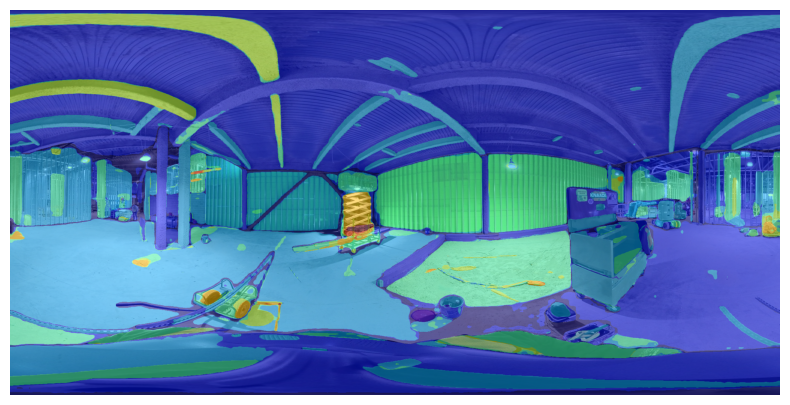

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Step 1: Load the Original Image
# Replace 'path_to_your_image.jpg' with the actual path to your image

image_path = '/home/ubuntu/workdir/hariharan/DATA/KU_EL/resized/VID_20241014_080159_00_040_IMG_00002.JPG'

image = cv2.imread(image_path)  # Loads image in BGR format (Height x Width x Channels)

# **Color Channel Explanation:**
# OpenCV reads images in BGR (Blue, Green, Red) format by default.
# However, Matplotlib and most image processing libraries use RGB (Red, Green, Blue) format.
# To correctly display and process the image, we need to convert it from BGR to RGB.

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

# Step 2: Resize the Image to Match Mask Dimensions
# Your masks have dimensions (1024, 2048), so resize the image accordingly.
# OpenCV uses (width, height) order for resizing.

image_resized = cv2.resize(image, (2048, 1024))  # Resize to (Width, Height)

# **Color Channel Explanation:**
# After resizing, 'image_resized' retains the shape (1024, 2048, 3), where 3 represents the RGB channels.

# Step 3: Combine All Masks
# Assuming 'f' is your array with shape (438, 1, 1024, 2048)
# Sum the masks to see how many times each pixel is masked

combined_mask_sum = f[:, 0, :, :].sum(axis=0)  # Shape: (1024, 2048)

# Normalize the combined mask to the range [0, 1]
combined_mask_norm = combined_mask_sum / combined_mask_sum.max()

# Step 4: Apply a Colormap to the Normalized Combined Mask
# Use a colormap to assign unique colors based on mask values

cmap = plt.cm.jet  # You can choose any colormap you prefer

# Apply the colormap to the normalized mask
colored_mask = cmap(combined_mask_norm)  # Returns an RGBA array of shape (1024, 2048, 4)

# **Color Channel Explanation:**
# The colormap maps each normalized mask value (from 0 to 1) to an RGBA color.
# 'colored_mask' now has four channels:
# - Red (R)
# - Green (G)
# - Blue (B)
# - Alpha (A) - opacity/transparency of the color

# Step 5: Overlay the Colored Mask onto the Original Image with Alpha Blending
alpha = 0.5  # Transparency level (0 = transparent, 1 = opaque)

# Ensure the image and mask are in float format and normalized to [0, 1]
image_resized = image_resized.astype(np.float32) / 255.0  # Normalize RGB values to [0, 1]

# Extract RGB channels from the colored mask
colored_mask_rgb = colored_mask[..., :3]  # Shape: (1024, 2048, 3)

# **Color Channel Explanation:**
# We extract the first three channels (R, G, B) from 'colored_mask' for blending.
# The fourth channel (Alpha) will be handled separately for transparency.

# Get the alpha channel from the colored mask and adjust with the desired transparency
mask_alpha = colored_mask[..., 3] * alpha  # Shape: (1024, 2048)

# **Color Channel Explanation:**
# The alpha channel in 'colored_mask' may not be meaningful (depends on the colormap).
# We multiply it by our desired alpha to control the transparency of the mask overlay.

# Expand 'mask_alpha' to match RGB channels for blending
mask_alpha_expanded = np.dstack((mask_alpha, mask_alpha, mask_alpha))  # Shape: (1024, 2048, 3)

# **Color Channel Explanation:**
# 'mask_alpha_expanded' now has the same shape as the RGB images, allowing per-pixel alpha blending for each color channel.

# Perform alpha blending
blended_image = mask_alpha_expanded * colored_mask_rgb + (1 - mask_alpha_expanded) * image_resized

# **Color Channel Explanation:**
# The blending is done separately for each color channel (R, G, B) using the formula:
# blended_pixel = mask_alpha * mask_color + (1 - mask_alpha) * original_color
# This ensures that the mask colors are correctly overlaid onto the original image with the specified transparency.

# Step 6: Display the Result
plt.figure(figsize=(10, 5))
plt.imshow(blended_image)
plt.axis('off')
plt.show()


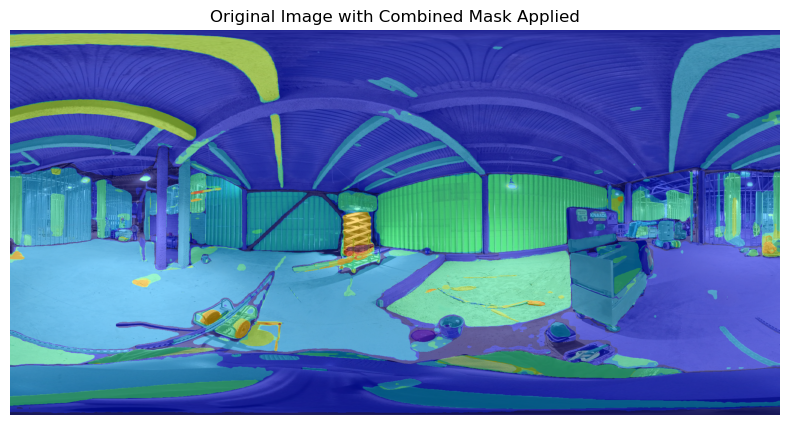

In [10]:
# Step 1: Load the Original Image
# Replace the path with the actual path to your image
image_path = '/home/ubuntu/workdir/hariharan/DATA/KU_EL/resized/VID_20241014_080159_00_040_IMG_00002.JPG'

# Load the image using OpenCV (which reads images in BGR format)
image = cv2.imread(image_path)  # Shape: (Height, Width, Channels)

# **Color Channel Explanation:**
# OpenCV reads images in BGR (Blue, Green, Red) format by default.
# Matplotlib expects images in RGB (Red, Green, Blue) format.
# To display and process the image correctly, we need to convert it from BGR to RGB.

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    # Convert the image from BGR to RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Shape remains the same

# Step 2: Resize the Image to Match Mask Dimensions
# Your masks have dimensions (1024, 2048), so resize the image accordingly.
# OpenCV's resize function uses (width, height) order.

image_resized = cv2.resize(image, (2048, 1024))  # Resize to (Width, Height)

# **Color Channel Explanation:**
# After resizing, 'image_resized' has the shape (1024, 2048, 3), where 3 represents the RGB channels.

# Step 3: Combine All Masks
# Assuming 'f' is your array with shape (438, 1, 1024, 2048)

# Sum the masks to see how many times each pixel is masked
combined_mask_sum = f[:, 0, :, :].sum(axis=0)  # Resulting shape: (1024, 2048)

# Normalize the combined mask to the range [0, 1]
combined_mask_norm = combined_mask_sum / combined_mask_sum.max()

# Step 4: Apply a Colormap to the Normalized Combined Mask
# Use a colormap to assign unique colors based on mask values

cmap = plt.cm.jet  # You can choose any colormap you prefer

# Apply the colormap to the normalized mask
colored_mask = cmap(combined_mask_norm)  # Returns an RGBA array of shape (1024, 2048, 4)

# **Color Channel Explanation:**
# The colormap maps each normalized mask value (from 0 to 1) to an RGBA color.
# 'colored_mask' now has four channels:
# - Red (R)
# - Green (G)
# - Blue (B)
# - Alpha (A) - opacity/transparency of the color

# Step 5: Overlay the Colored Mask onto the Original Image with Alpha Blending
alpha = 0.5  # Transparency level (0 = transparent, 1 = opaque)

# Ensure the image and mask are in float format and normalized to [0, 1]
image_resized = image_resized.astype(np.float32) / 255.0  # Normalize image RGB values to [0, 1]

# Extract RGB channels from the colored mask
colored_mask_rgb = colored_mask[..., :3]  # Shape: (1024, 2048, 3)

# **Color Channel Explanation:**
# We extract the first three channels (R, G, B) from 'colored_mask' for blending.
# The fourth channel (Alpha) will be handled separately for transparency.

# Get the alpha channel from the colored mask and adjust with the desired transparency
mask_alpha = colored_mask[..., 3] * alpha  # Shape: (1024, 2048)

# **Color Channel Explanation:**
# The alpha channel in 'colored_mask' may not be meaningful (depends on the colormap).
# We multiply it by our desired alpha to control the transparency of the mask overlay.

# Since the colormap may set the alpha channel to 1.0 by default, we can override it:
mask_alpha = alpha  # Set a constant alpha value for the entire mask

# Expand 'mask_alpha' to match RGB channels for blending
mask_alpha_expanded = np.dstack((mask_alpha, mask_alpha, mask_alpha))  # Shape: (1024, 2048, 3)

# **Color Channel Explanation:**
# 'mask_alpha_expanded' now has the same shape as the RGB images, allowing per-pixel alpha blending for each color channel.

# Perform alpha blending
blended_image = mask_alpha_expanded * colored_mask_rgb + (1 - mask_alpha_expanded) * image_resized

# **Color Channel Explanation:**
# The blending is done separately for each color channel (R, G, B) using the formula:
# blended_pixel = mask_alpha * mask_color + (1 - mask_alpha) * original_color
# This ensures that the mask colors are correctly overlaid onto the original image with the specified transparency.

# Step 6: Display the Result
plt.figure(figsize=(10, 5))
plt.imshow(blended_image)
plt.axis('off')
plt.title('Original Image with Combined Mask Applied')
plt.show()
